## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [5]:
#load the file
df = pd.read_csv("opsd_germany_daily.csv")
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [13]:
print(df.shape)

(4383, 5)


In [26]:
pd.to_datetime(df["Date"])
df.index=pd.to_datetime(df["Date"])
df.head()
df.drop(columns=['Date'])

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [27]:
 # Description
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Then, make sure to transform the dates into datetime format in pandas :

In [28]:
# Transform the dates into datetime format
df.index = pd.to_datetime(df.index)

type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### 1. Plotting and understanding a time series

Q1 - Plot the different time series. What do you understand, what do you notice ?

<Figure size 1200x800 with 0 Axes>

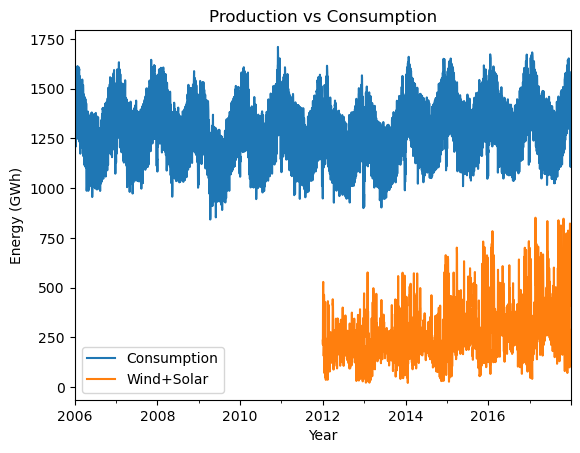

In [29]:
plt.figure(figsize=(12,8))

# Plot the production and consumption columns
df[["Consumption", "Wind+Solar"]].plot()

# Set the plot title and axis labels
plt.title("Production vs Consumption")
plt.xlabel("Year")
plt.ylabel("Energy (GWh)")

plt.show()

We can also avoid plotting lines and simply plot dots for the consumption :

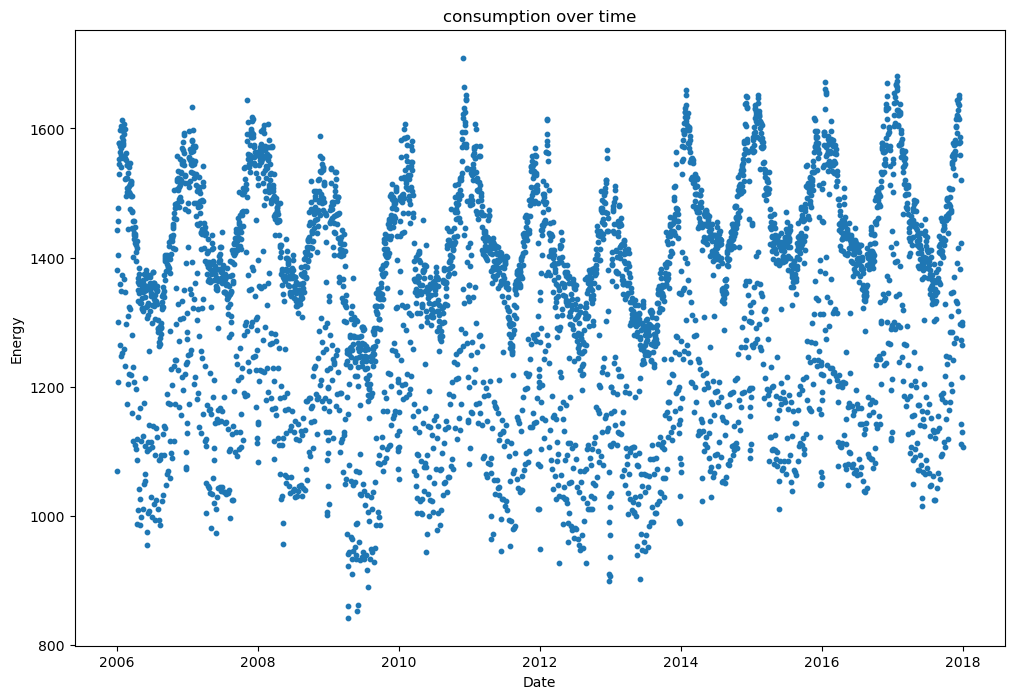

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(df.index,df["Consumption"],s =10)
plt.title("consumption over time")
plt.xlabel("Date")
plt.ylabel("Energy")
plt.show()

And plot the production over time :

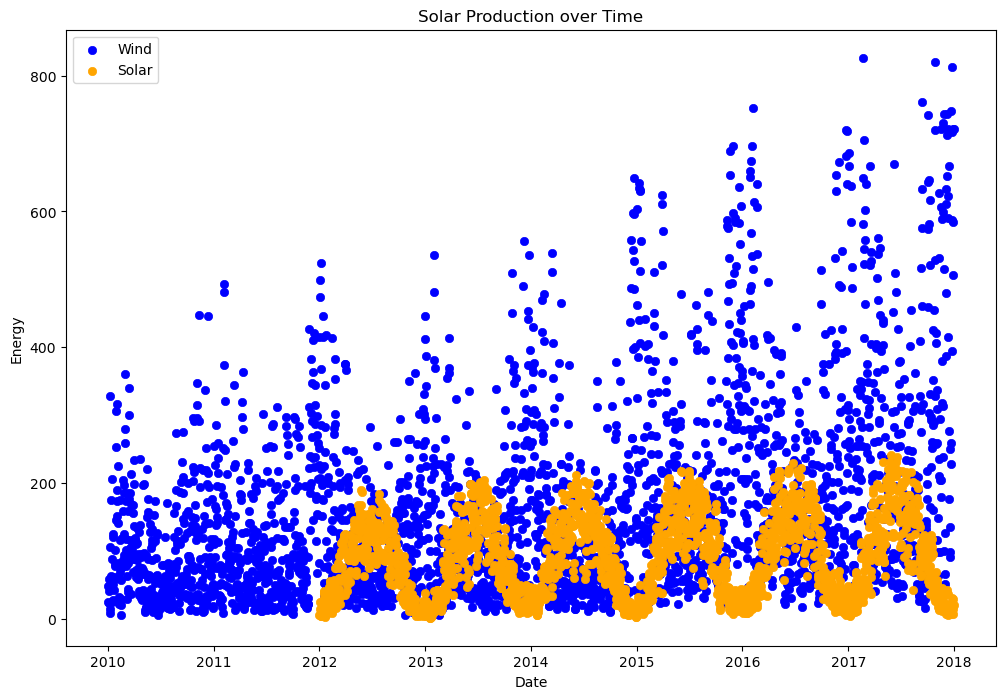

In [34]:

plt.figure(figsize=(12,8))

# Create a scatter plot for the "Wind" column
plt.scatter(df.index, df["Wind"], color="blue", label="Wind",linewidth = 0.5)

# Create a scatter plot for the "Solar" column
plt.scatter(df.index, df["Solar"], color="orange", label="Solar",linewidth = 0.5)

# Set the plot title and axis labels
plt.title("Solar Production over Time")
plt.xlabel("Date")
plt.ylabel("Energy")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


What can we notice ?
+ the consumption is larger than the production
+ we have no overall production data before 2012
+ the production and the consumption are both seasonal, i.e. they vary within a year given some pattern
+ there is a trend in production (the higher part), and outliers downwards

How do consumption and production compare ?
+ We notice that wind bsaed production increases over time, and is rather high in winter (for example more storms).
+ On the other hand, the solar production is higher in summer (seems logic)
+ The consumption is higher in winter

In [35]:
df["Consumption"]["2012-01":"2017-12"]

Date
2012-01-01     948.12800
2012-01-02    1269.58100
2012-01-03    1334.74500
2012-01-04    1347.13600
2012-01-05    1376.65800
                 ...    
2017-12-27    1263.94091
2017-12-28    1299.86398
2017-12-29    1295.08753
2017-12-30    1215.44897
2017-12-31    1107.11488
Name: Consumption, Length: 2192, dtype: float64

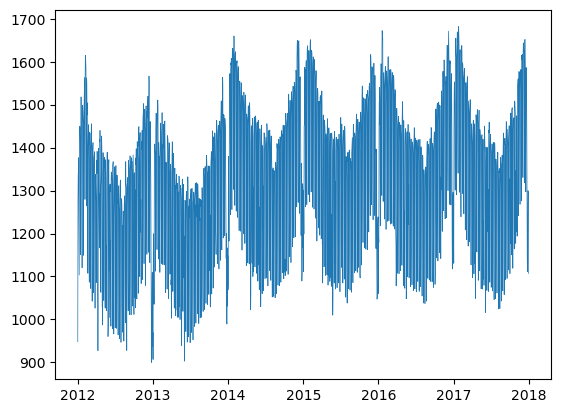

In [36]:
plt.plot(df.loc["2012-01":"2017-12"]["Consumption"], linewidth =0.5,label = "Consumption")

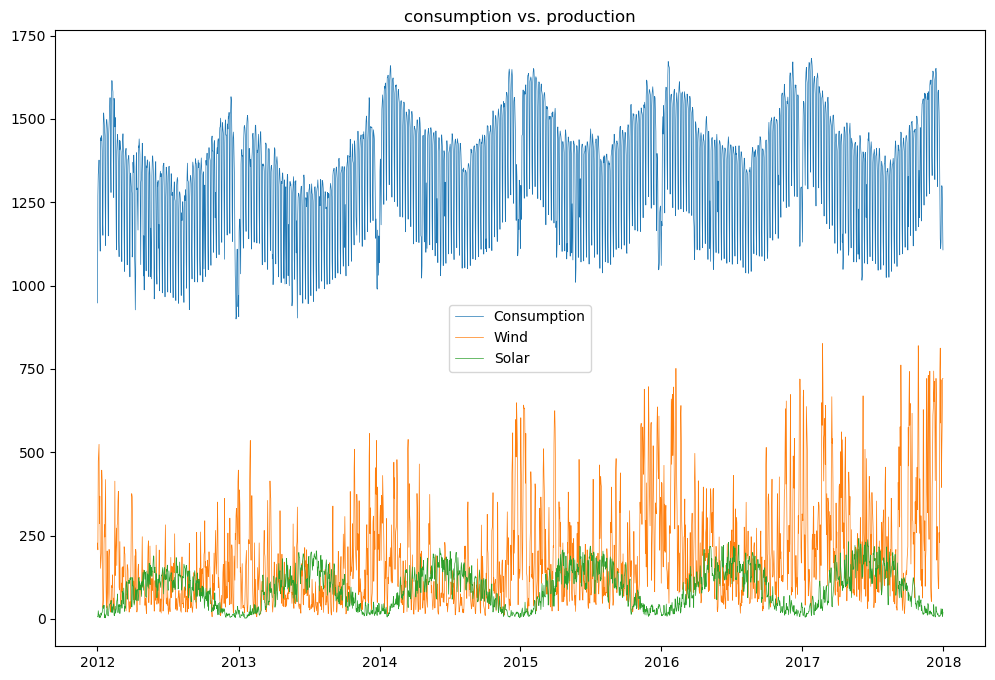

In [37]:
plt.figure(figsize=(12,8))
plt.title("consumption vs. production")
plt.plot(df.loc["2012-01":"2017-12"]["Consumption"], linewidth =0.5,label = "Consumption")
plt.plot(df.loc["2012-01":"2017-12"]["Wind"], linewidth =0.5,label = "Wind")
plt.plot(df.loc["2012-01":"2017-12"]["Solar"], linewidth =0.5,label = "Solar")
plt.legend()
plt.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

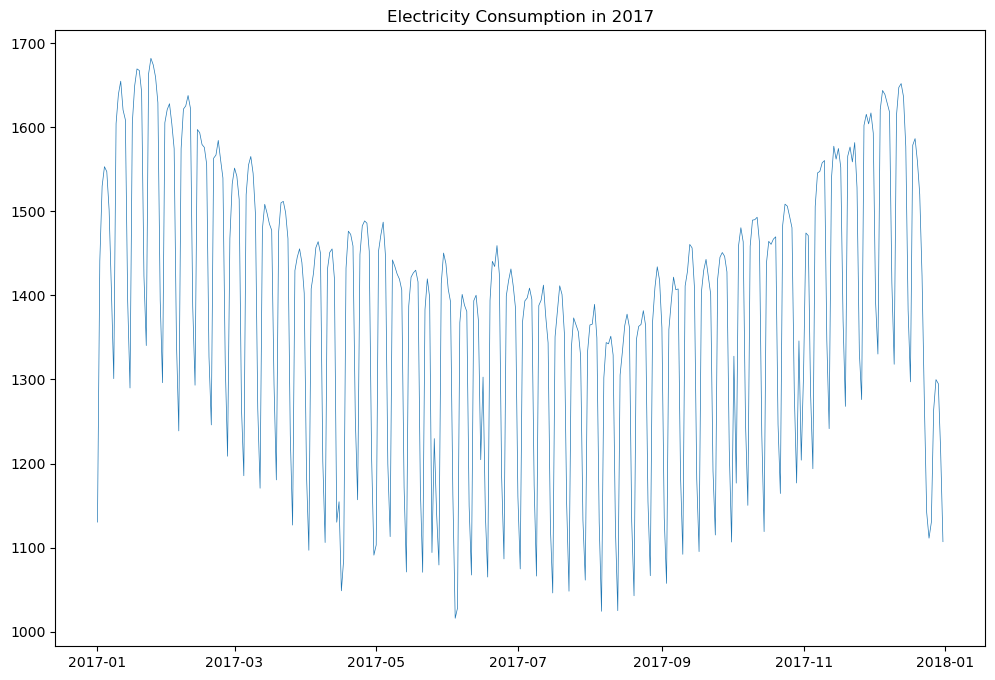

In [38]:
# Plot over the year
plt.figure(figsize=(12,8))
plt.title("Electricity Consumption in 2017")
plt.plot(df.loc["2017-01-01":"2017-12-31"]["Consumption"], linewidth =0.5,label = "Consumption")
plt.show()

It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

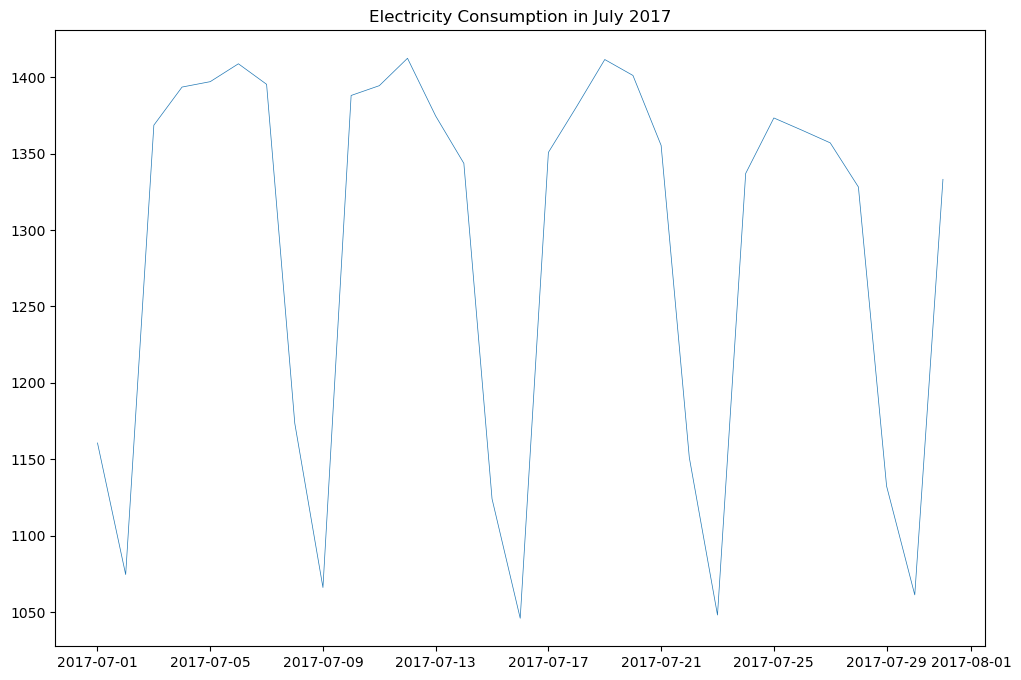

In [39]:
# Plot over a month
plt.figure(figsize=(12,8))
plt.title("Electricity Consumption in July 2017")
plt.plot(df.loc["2017-07-01":"2017-07-31"]["Consumption"], linewidth =0.5,label = "Consumption")
plt.show()

When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

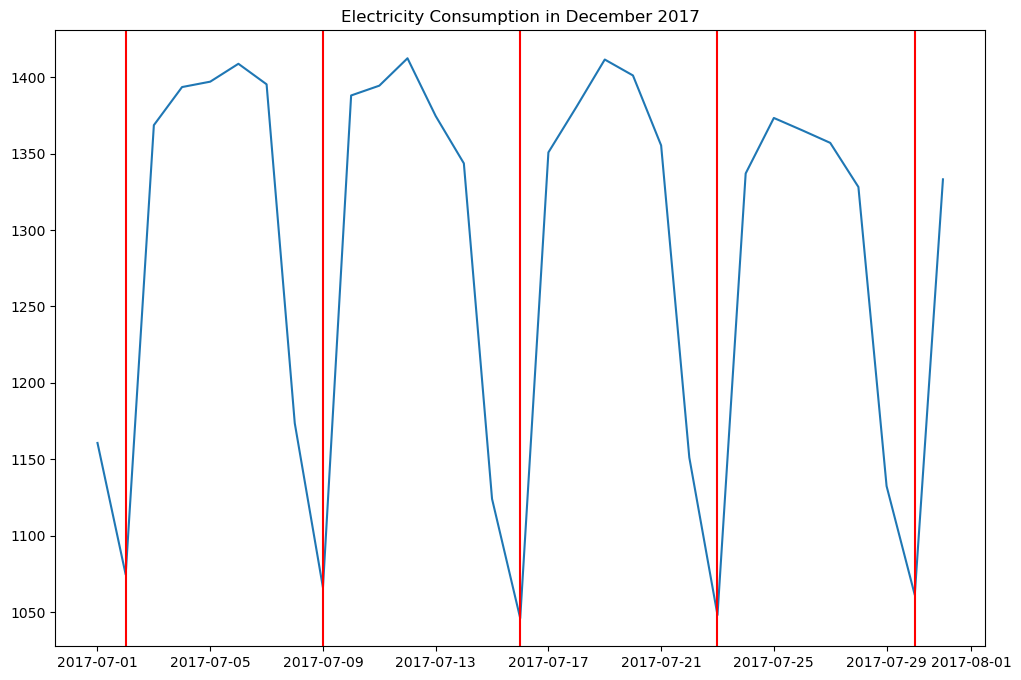

In [41]:
# Plot on Sundays
plt.figure(figsize=(12,8))
plt.title("Electricity Consumption in December 2017")
plt.plot(df.loc["2017-07-01":"2017-07-31"]["Consumption"])
plt.axvline(pd.to_datetime("2017-07-02"),c="r")
plt.axvline(pd.to_datetime("2017-07-09"),c="r")
plt.axvline(pd.to_datetime("2017-07-16"),c="r")
plt.axvline(pd.to_datetime("2017-07-23"),c="r")
plt.axvline(pd.to_datetime("2017-07-30"),c="r")
plt.show()

### 3. Further exploration

Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [50]:
df.drop(columns=["Date"], inplace=True)
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [51]:
# new columns 'year' and 'month'
df_2 = df.reset_index()
df_2['year'] = [d.year for d in df_2.Date]
df_2['month'] = [d.strftime("%b") for d in df_2.Date]
years = df_2['year'].unique()
print(years)
df_2.head()

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,Jan
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,Jan
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,Jan
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,Jan
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,Jan


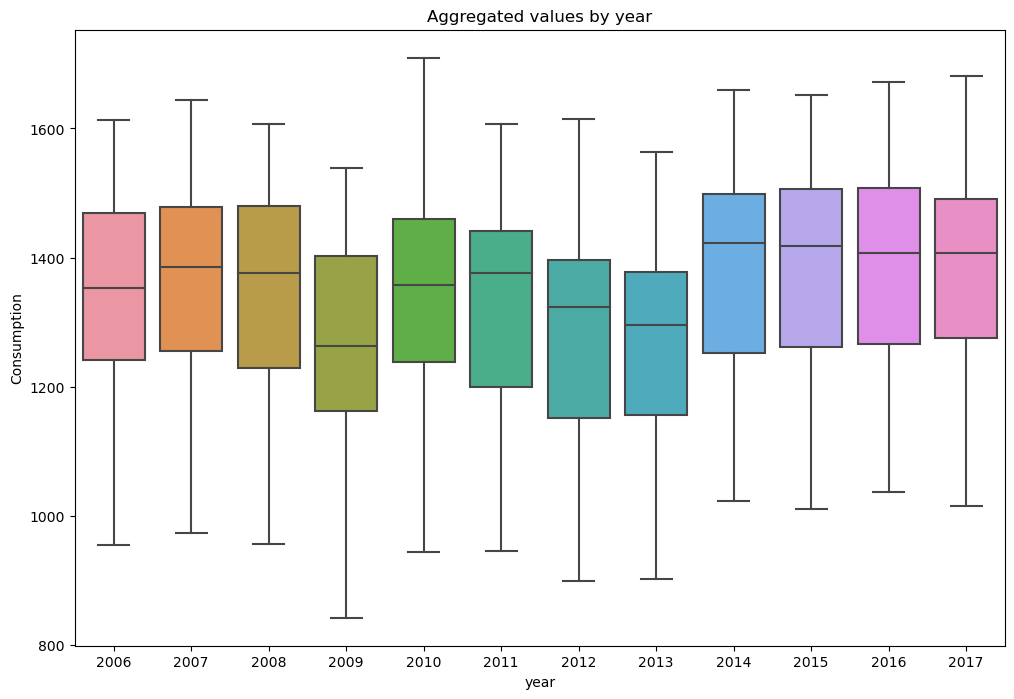

In [52]:
# Boxplot year
import seaborn as sns
plt.figure(figsize=(12,8))
plt.title("Aggregated values by year")
sns.boxplot(x="year",y="Consumption",data=df_2)
plt.show()

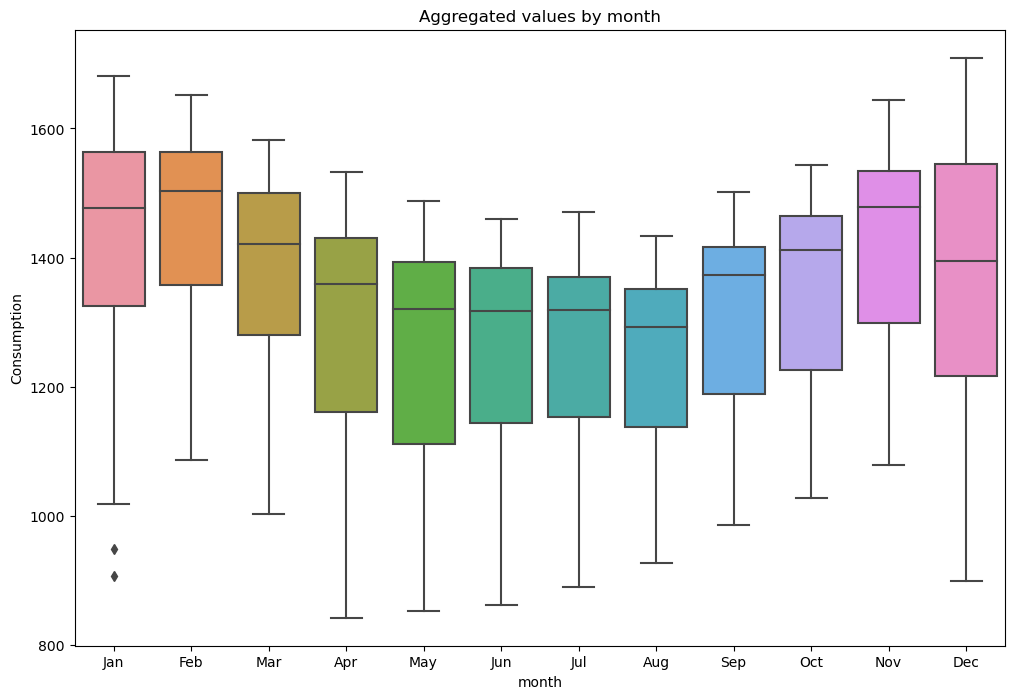

In [53]:
# Boxplot month
plt.figure(figsize=(12,8))
plt.title("Aggregated values by month")
sns.boxplot(x="month",y="Consumption",data=df_2)
plt.show()

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

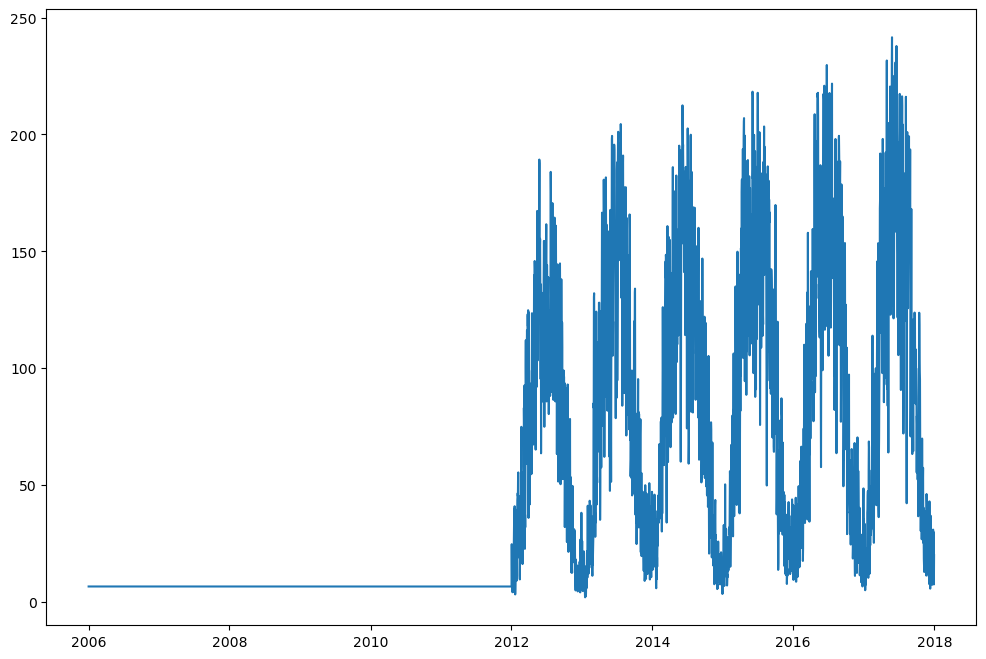

In [54]:
# Plot Solar
plt.figure(figsize=(12,8))
plt.plot(df["Solar"].bfill(axis=0))
plt.show()

The forward and backward fill are useful when some values are missing within the data, not when we miss years of data. This is a clear illustration.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [55]:
# Correlation between consumption and overall production
df['Consumption']['2012-01-01':].corr(df['Wind+Solar']['2012-01-01':])

0.027647843859240902

In [56]:
# Plot
plt.figure(figsize=(12,8))

plt.show()

<Figure size 1200x800 with 0 Axes>

In [57]:
# Correlation between solar production and wind production
df["Solar"]["2012-01-01":].corr(df["Wind"]["2012-01-01":])

-0.3088318295977341

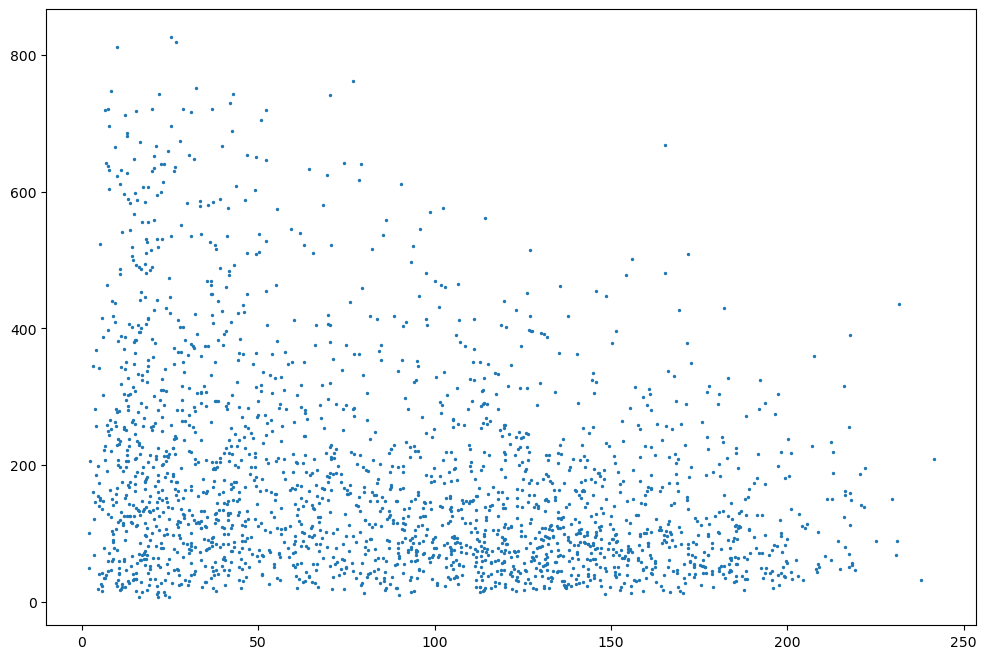

In [58]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(df["Solar"]["2012-01-01":], df["Wind"]["2012-01-01":],s=2)
plt.show()

In [59]:
# Correlation between consumption and wind production
df["Consumption"]["2012-01-01":].corr(df["Wind"]["2012-01-01":])

0.13518640075918514

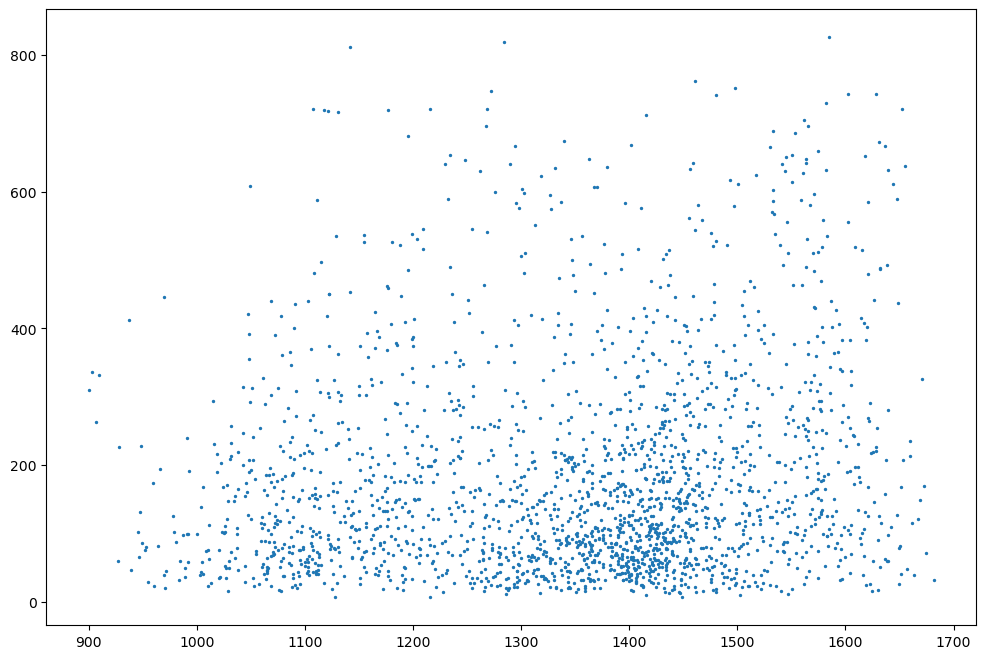

In [60]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(df["Consumption"]["2012-01-01":], df["Wind"]["2012-01-01":],s=2)
plt.show()

In [61]:
# Correlation between consumption and solar production
df["Consumption"]["2012-01-01":].corr(df["Solar"]["2012-01-01":])

-0.27894265519914385

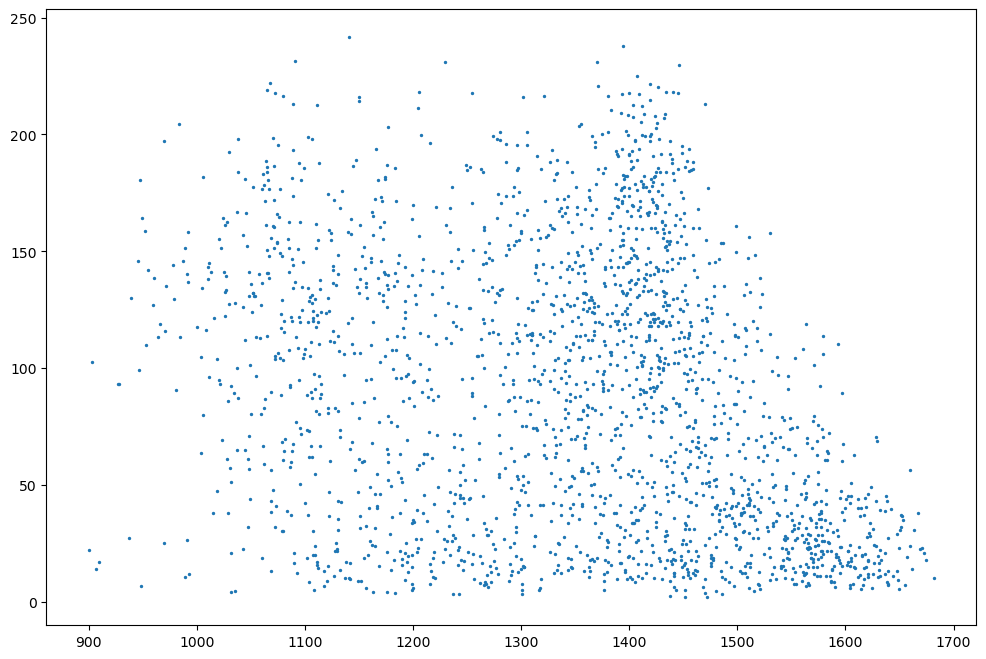

In [62]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(df["Consumption"]["2012-01-01":], df["Solar"]["2012-01-01":],s=2)
plt.show()